In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/store-transaction-data.csv')

In [3]:
df

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS
...,...,...,...,...,...,...,...,...,...,...
14255,M3,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14256,M3,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14258,M1,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


from matplotlib import pyplot as plt
df['QTY'].plot(kind='hist', bins=20, title='QTY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['VALUE'].plot(kind='hist', bins=20, title='VALUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('MONTH').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='QTY', y='VALUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['QTY'].plot(kind='line', figsize=(8, 4), title='QTY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['VALUE'].plot(kind='line', figsize=(8, 4), title='VALUE')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='QTY', y='MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['MONTH'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='VALUE', y='MONTH', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [4]:
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                QTY         VALUE
count  14260.000000  14260.000000
mean      16.354488    294.455330
std       34.365583    760.129558
min        0.000000      0.000000
25%        1.000000     10.000000
50%        4.000000     99.000000
75%       16.000000    283.000000
max      641.000000  24185.000000


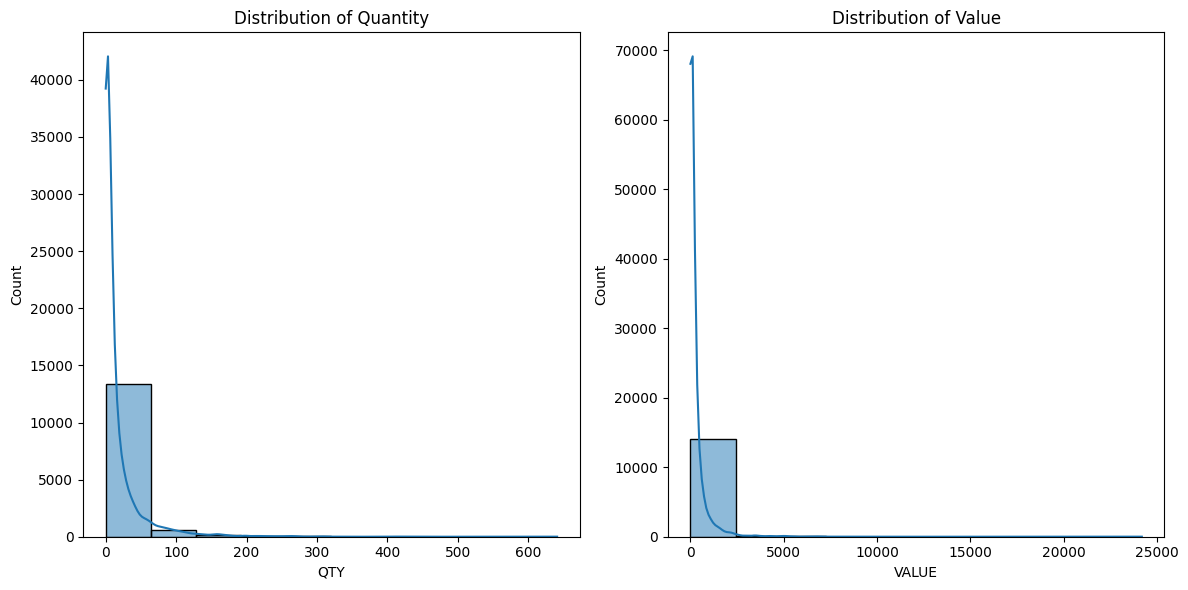

In [6]:
# Distribution of QTY and VALUE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['QTY'], bins=10, kde=True)
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(df['VALUE'], bins=10, kde=True)
plt.title('Distribution of Value')

plt.tight_layout()
plt.show()

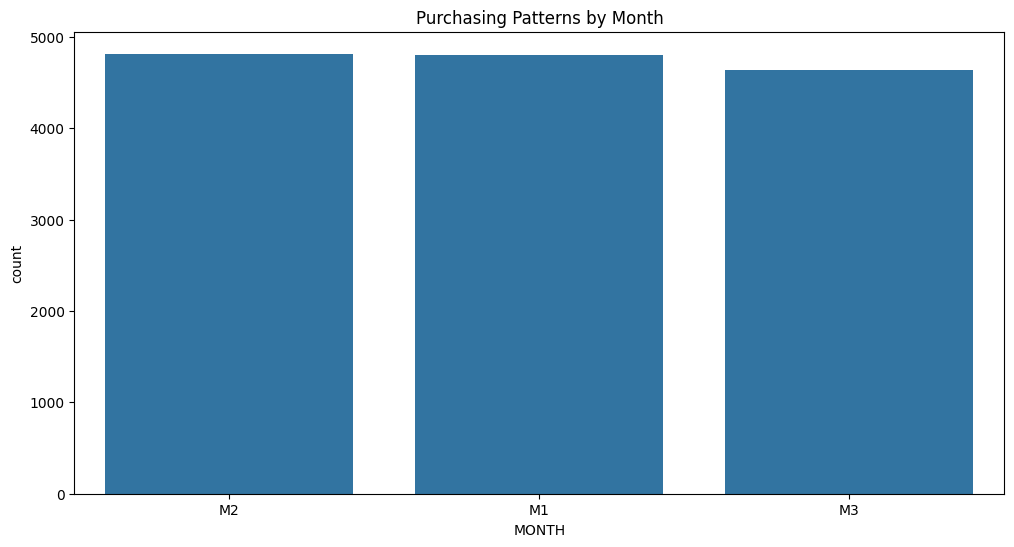

In [9]:
# Purchasing patterns by month
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='MONTH', order=df['MONTH'].value_counts().index)
plt.title('Purchasing Patterns by Month')
plt.show()

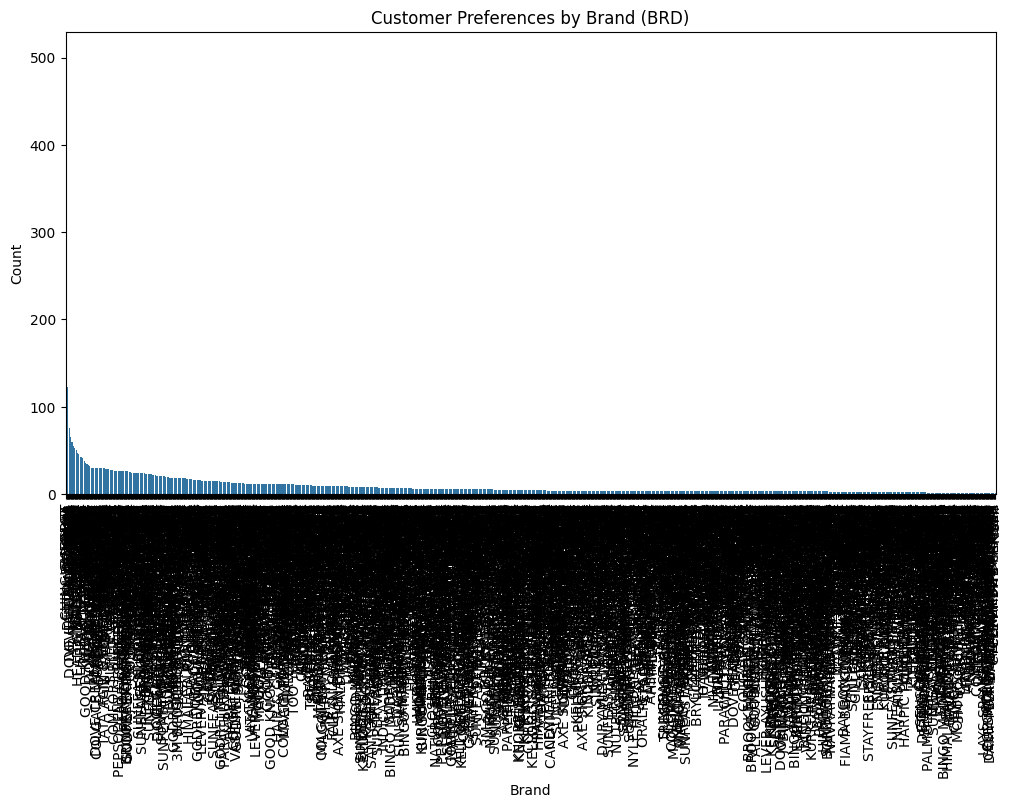

In [10]:
# Customer Preferences by Brand (BRD)
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='BRD', order=df['BRD'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Customer Preferences by Brand (BRD)')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()

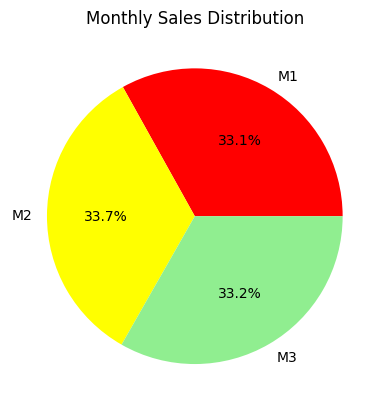

In [32]:
monthly_sales = df.groupby("MONTH")["VALUE"].sum()
plt.pie(monthly_sales, labels=monthly_sales.index, autopct="%1.1f%%", colors=["red", "yellow", "lightgreen", "blue", "purple", "orange"])
plt.title("Monthly Sales Distribution")
plt.show()

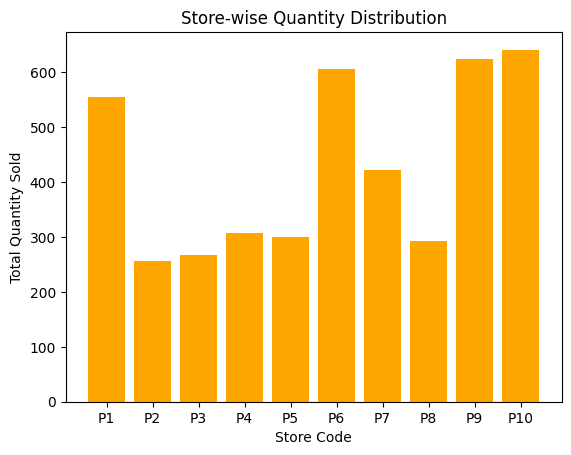

In [34]:
plt.bar(df["STORECODE"], df["QTY"], color="orange")
plt.xlabel("Store Code")
plt.ylabel("Total Quantity Sold")
plt.title("Store-wise Quantity Distribution")
plt.show()

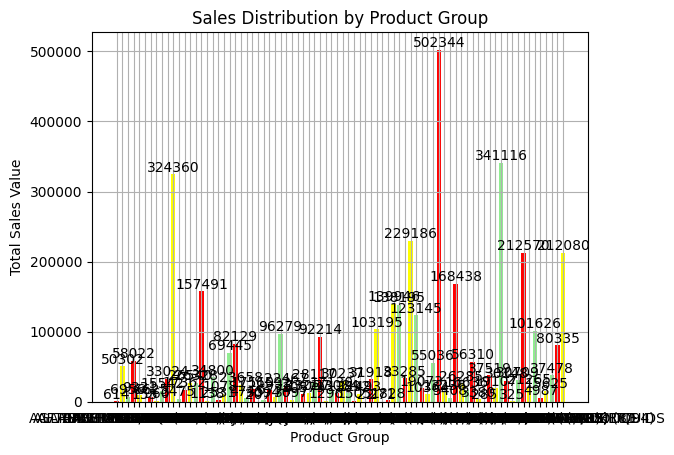

In [20]:
plt.bar(group_sales.index, group_sales.values, color=["red", "yellow", "lightgreen"])
plt.xlabel("Product Group")
plt.ylabel("Total Sales Value")
plt.title("Sales Distribution by Product Group")

plt.grid(True)

for i, value in enumerate(group_sales.values):
    plt.annotate(str(value), xy=(i, value), ha="center", va="bottom")

plt.show()

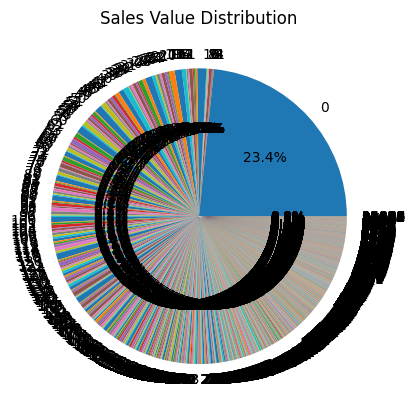

In [39]:
import matplotlib.pyplot as plt

# Calculate the frequency distribution of sales values
value_counts = df["VALUE"].value_counts().sort_index()

# Create the pie chart
plt.pie(value_counts.values, labels=value_counts.index, autopct="%1.1f%%")

# Add title
plt.title("Sales Value Distribution")

# Show the pie chart
plt.show()

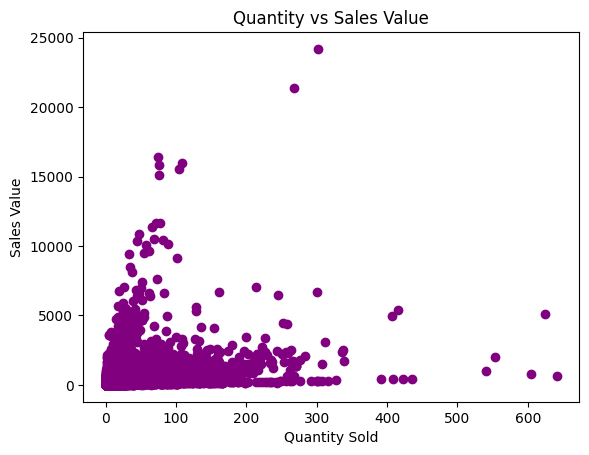

In [18]:
plt.scatter(df["QTY"], df["VALUE"], color="purple")
plt.xlabel("Quantity Sold")
plt.ylabel("Sales Value")
plt.title("Quantity vs Sales Value")
plt.show()

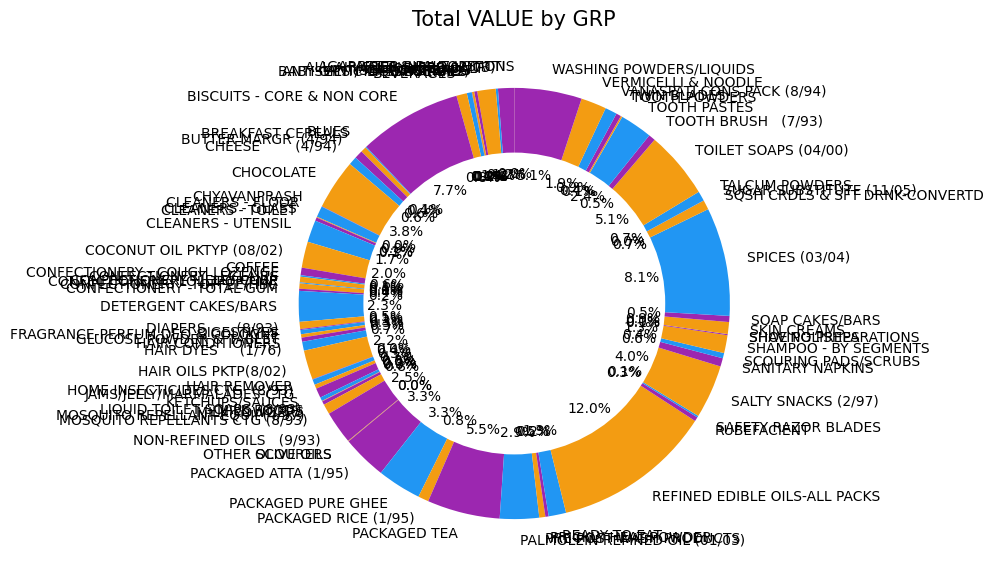

In [35]:
import matplotlib.pyplot as plt

colors = ["#F39C12", "#9C27B0", "#2196F3"]

grp_sales = df.groupby('GRP')['VALUE'].sum()

plt.figure(figsize=(7, 7))
plt.pie(grp_sales, labels=grp_sales.index, autopct="%1.1f%%", colors=colors, startangle=90)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Total VALUE by GRP', fontsize=15)
plt.show()

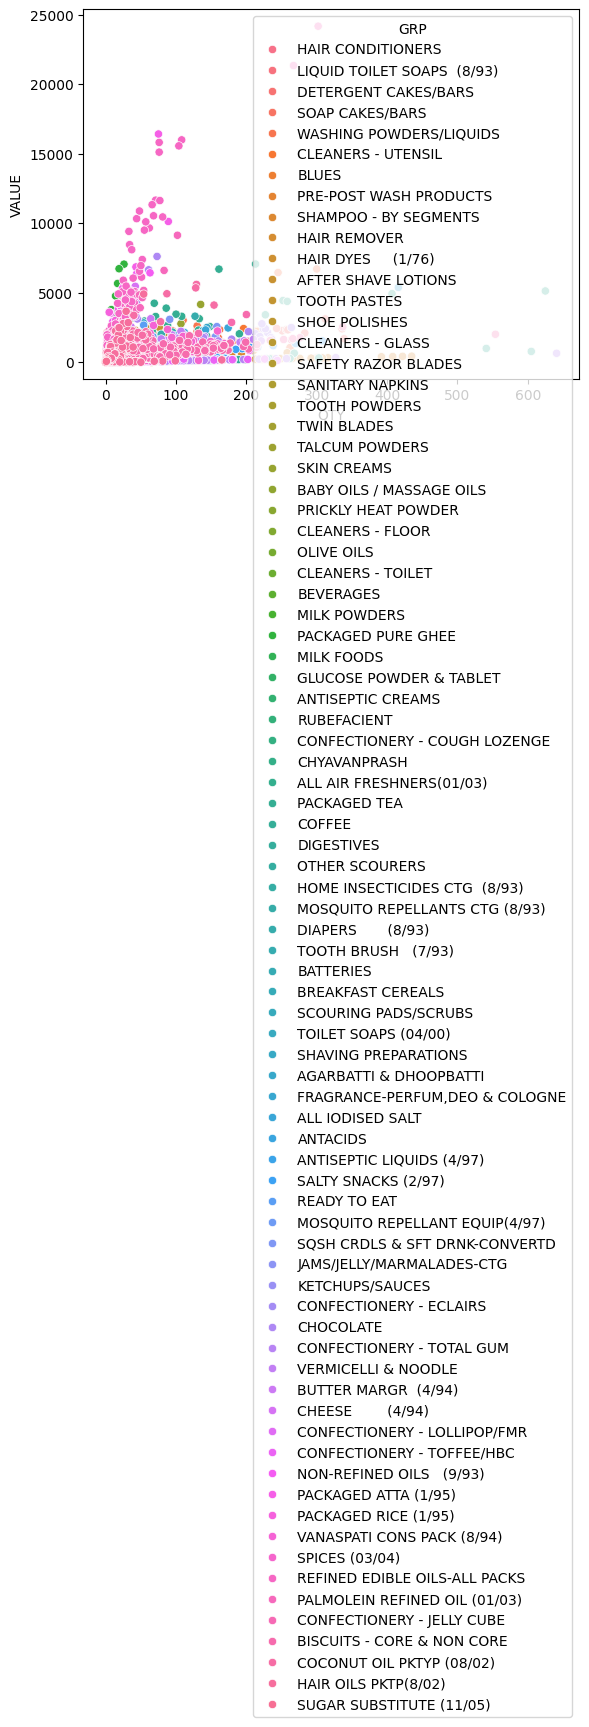

In [30]:
# Create a scatterplot of QTY vs. VALUE, colored by GRP
sns.scatterplot(x="QTY", y="VALUE", hue="GRP", data=df)
plt.show()